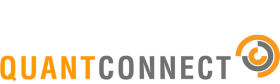
##Introduction to Financial Python [Tutorial 4]

##Métodos Numéricos
###Gustavo Alberto Puentes Romero

#NumPy and Basic Pandas

##Introducción
Ahora que hemos introducido los fundamentos de Python, es hora de aprender sobre NumPy y Pandas.

##Numpy
NumPy es la biblioteca central para la computación científica en Python. Proporciona un objeto de matriz multidimensional de alto rendimiento y herramientas para trabajar con estas matrices. También tiene una fuerte integración con Pandas, que es otra herramienta poderosa para manipular datos financieros.

Los paquetes de Python como NumPy y Pandas contienen clases y métodos que podemos usar al importar el paquete:

In [1]:
import numpy as np

###Matrices NumPy básicas

Una matriz NumPy es una cuadrícula de valores, todos del mismo tipo, y está indexada por una tupla de enteros no negativos. Aquí hacemos una matriz pasando una lista de precios de acciones de Apple:

In [2]:
price_list = [143.73, 145.83, 143.68, 144.02, 143.5, 142.62]
price_array = np.array(price_list)
print (price_array, type(price_array))

[143.73 145.83 143.68 144.02 143.5  142.62] <class 'numpy.ndarray'>


Observe que el tipo de matriz es "ndarray", que es una matriz multidimensional. Si pasamos np.array () una lista de listas, creará una matriz bidimensional.

In [3]:
Ar = np.array([[1,3], [2,4]])
print (Ar, type(Ar))

[[1 3]
 [2 4]] <class 'numpy.ndarray'>


Obtenemos las dimensiones de un ndarray usando el atributo .shape:

In [4]:
print (Ar.shape)

(2, 2)


Si creamos una matriz bidimensional (es decir, una matriz), se puede acceder a cada fila por índice:

In [5]:
print (Ar[0])
print (Ar[1])

[1 3]
[2 4]


Si queremos acceder a la matriz por columna:

In [6]:
print ('First column:', Ar[:,0])
print ('Second column:', Ar[:,1])

First column: [1 2]
Second column: [3 4]


### Funciones de matriz

Algunas funciones integradas en NumPy que nos permiten realizar cálculos en matrices. Por ejemplo, podemos aplicar el logaritmo natural a cada elemento de una matriz:

In [7]:
np.log(price_array)

array([4.96793654, 4.98244156, 4.9675886 , 4.96995218, 4.96633504,
       4.96018375])

Otras funciones devuelven un solo valor:

In [8]:
print (np.mean(price_array))
print (np.std(price_array))
print (np.sum(price_array))
print (np.max(price_array))

143.89666666666668
0.9673790478515796
863.38
145.83


Las funciones anteriores devuelven la media, la desviación estándar, el valor total y máximo de una matriz.

##Pandas

Pandas es una de las herramientas más poderosas para manejar datos financieros. Primero necesitamos importar Pandas:

In [9]:
import pandas as pd

###Serie

La serie es una matriz etiquetada unidimensional capaz de contener cualquier tipo de datos (integers, strings, float, objects, etc.)

Creamos una serie llamando a pd.Series (datos), donde los datos pueden ser un diccionario, una matriz o simplemente un valor escalar.

In [10]:
price = [143.73, 145.83, 143.68, 144.02, 143.5, 142.62]
s = pd.Series(price)
print (s)

0    143.73
1    145.83
2    143.68
3    144.02
4    143.50
5    142.62
dtype: float64


Podemos personalizar los índices de una nueva Serie:

In [11]:
s = pd.Series(price, index = ['a', 'b', 'c', 'd', 'e', 'f'])
print (s)

a    143.73
b    145.83
c    143.68
d    144.02
e    143.50
f    142.62
dtype: float64


O podemos cambiar los índices de una Serie existente:

In [12]:
s.index = [6,5,4,3,2,1]
print (s)

6    143.73
5    145.83
4    143.68
3    144.02
2    143.50
1    142.62
dtype: float64


La serie es como una lista, ya que se puede dividir por índice:

In [13]:
print (s[1:])
print (s[:-2])

5    145.83
4    143.68
3    144.02
2    143.50
1    142.62
dtype: float64
6    143.73
5    145.83
4    143.68
3    144.02
dtype: float64


La serie también es como un diccionario cuyos valores se pueden establecer o recuperar por etiqueta de índice:

In [14]:
print (s[4])
s[4] = 0
print (s)

143.68
6    143.73
5    145.83
4      0.00
3    144.02
2    143.50
1    142.62
dtype: float64


La serie también puede tener un atributo de nombre, que se utilizará cuando creemos un Pandas DataFrame utilizando varias series.

In [15]:
s = pd.Series(price, name = 'Apple Prices')
print (s)
print (s.name)

0    143.73
1    145.83
2    143.68
3    144.02
4    143.50
5    142.62
Name: Apple Prices, dtype: float64
Apple Prices


Podemos obtener los resúmenes estadísticos de una Serie:

In [16]:
print (s.describe())

count      6.000000
mean     143.896667
std        1.059711
min      142.620000
25%      143.545000
50%      143.705000
75%      143.947500
max      145.830000
Name: Apple Prices, dtype: float64


###Índice de tiempo

Pandas tiene una función incorporada específicamente para crear índices de fecha: pd.date_range (). Lo usamos para crear un nuevo índice para nuestra Serie:

In [17]:
time_index = pd.date_range('2017-01-01', periods = len(s), freq = 'D')
print (time_index)
s.index = time_index
print (s)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06'],
              dtype='datetime64[ns]', freq='D')
2017-01-01    143.73
2017-01-02    145.83
2017-01-03    143.68
2017-01-04    144.02
2017-01-05    143.50
2017-01-06    142.62
Freq: D, Name: Apple Prices, dtype: float64


Por lo general, se accede a las series mediante los métodos iloc [] y loc []. iloc [] se usa para acceder a elementos por índice entero, y loc [] se usa para acceder al índice de la serie.

iloc [] es necesario cuando el índice de una serie son números enteros, tome nuestra serie definida anterior como ejemplo:

In [18]:
s.index = [6,5,4,3,2,1]
print (s)
print (s[1])

6    143.73
5    145.83
4    143.68
3    144.02
2    143.50
1    142.62
Name: Apple Prices, dtype: float64
142.62


Si tuviéramos la intención de tomar el segundo elemento de la serie, cometeríamos un error aquí, porque los índices son números enteros. Para acceder al elemento que queremos, usamos iloc [] aquí:

In [19]:
print (s.iloc[1])

145.83


Al trabajar con datos de series de tiempo, a menudo usamos el tiempo como índice. Pandas nos proporciona varios métodos para acceder a los datos por índice de tiempo.

In [20]:
s.index = time_index
print (s['2017-01-03'])

143.68


Incluso podemos acceder a un rango de fechas:

In [21]:
print (s['2017-01-02':'2017-01-05'])

2017-01-02    145.83
2017-01-03    143.68
2017-01-04    144.02
2017-01-05    143.50
Freq: D, Name: Apple Prices, dtype: float64


Series [] nos proporciona una forma muy flexible de indexar datos. Podemos agregar cualquier condición entre corchetes:

In [22]:
print (s[s < np.mean(s)])
print (s[(s > np.mean(s)) & (s < np.mean(s) + 1.64*np.std(s))])

2017-01-01    143.73
2017-01-03    143.68
2017-01-05    143.50
2017-01-06    142.62
Name: Apple Prices, dtype: float64
2017-01-04    144.02
Freq: D, Name: Apple Prices, dtype: float64


Como se demostró, podemos usar operadores lógicos como & (y), | (o) y ~ (no) para agrupar varias condiciones.

#Resumen
Aquí presentamos NumPy y Pandas para la computación científica en Python.